In [103]:
# Let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql.types import *
from pyspark.sql.functions import datediff, to_date, lit, to_timestamp, col
from pyspark.sql.types import DateType

In [2]:
# create the session
spark = SparkSession.builder.getOrCreate()

# create the context
sc = spark.sparkContext

In [142]:
#read userProfile
userProfile = spark.read.csv("data/users/public_users.csv", header = True)
#filter data on followers_count >= 1 or following_count >= 1
userProfile = userProfile.filter("followers_count >= 1" or "following_count >= 1")
#covert to date 
temp = userProfile.withColumn("record_date",userProfile['created_at'].cast(DateType()))
#get Average daily Tweets
userProfileWithTime = temp.withColumn("days", datediff(to_date(lit("2020-12-12")),'record_date'))
userProfileWithTime = userProfileWithTime.withColumn("dailyTweetsAverage",lit(userProfileWithTime.tweet_count/userProfileWithTime.days))
userProfilePD = userProfileWithTime.toPandas()
userProfilePD.head()

,id,username,protected,verified,created_at,followers_count,following_count,tweet_count,listed_count,record_date,days,dailyTweetsAverage
0,129007523,biabiz,False,False,2010-04-02T22:25:11.000Z,15,3,1,0,2010-04-02,3907,0.000256
1,32670411,girl51,False,False,2009-04-17T23:54:26.000Z,3,20,1,0,2009-04-17,4257,0.000235
2,290473066,1972mercedes,False,False,2011-04-30T10:09:22.000Z,2,1,0,0,2011-04-30,3514,0.000000
3,555533734,FeralWatches,False,False,2012-04-17T00:20:46.000Z,310,112,1287,6,2012-04-17,3161,0.407150
4,2172324931,Polyanna2Silva,False,False,2013-11-03T15:15:44.000Z,1,16,0,0,2013-11-03,2596,0.000000


In [108]:
userProfilePD_part = userProfilePD[['dailyTweetsAverage','tweet_count','followers_count','following_count']].apply(lambda x: x.astype(int))
userProfilePD_part.describe()

,dailyTweetsAverage,tweet_count,followers_count,following_count
count,18681.000000,18681.000000,18681.000000,18681.000000
mean,0.232589,929.461003,88.196296,114.715058
std,2.259697,7064.900196,707.524976,542.530220
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,3.000000
50%,0.000000,4.000000,5.000000,20.000000
75%,0.000000,53.000000,22.000000,76.000000
max,160.000000,441795.000000,44835.000000,34035.000000


In [110]:
#when users were created
print("When users were created:")
print("\nIn days")
print(userProfilePD["days"].describe())
print("\n In years")
t = userProfilePD["days"]/365
print(t.describe())

When users were created:

In days
count    18681.000000
mean      3063.863926
std        588.169620
min       1697.000000
25%       2579.000000
50%       3002.000000
75%       3485.000000
max       5009.000000
Name: days, dtype: float64

 In years
count    18681.000000
mean         8.394148
std          1.611424
min          4.649315
25%          7.065753
50%          8.224658
75%          9.547945
max         13.723288
Name: days, dtype: float64


C:\Users\jerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


NameError: name 'pl' is not defined

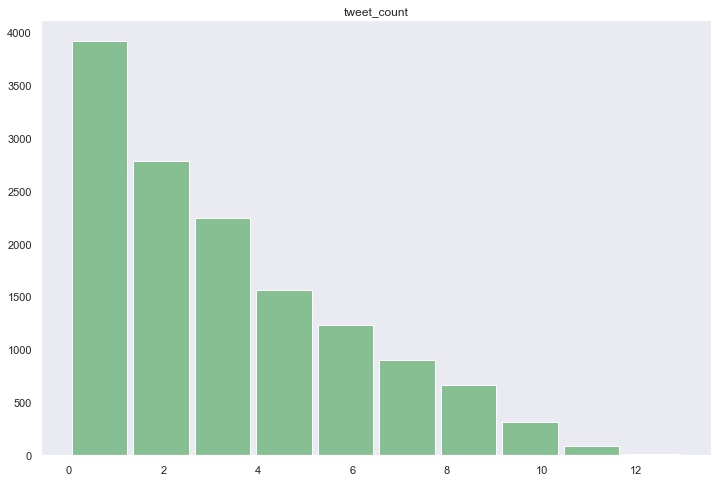

In [175]:
t = userProfilePD_part[userProfilePD_part["tweet_count"] > 0]
t["tweet_count"]=  np.log(t["tweet_count"])
ax = t.hist(column = "tweet_count", grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
pl.xlabel("Age")
plt.show()
